In [173]:
import os
from Bio.SeqIO import QualityIO
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import gzip
import glob
import re
from DMS_utils import dna_rev_comp, translate_dna2aa
import pysam
import pandas as pd
import seaborn as sns
import pickle as pkl
import matplotlib.colors as mcolors
from scipy import stats
import os.path
from matplotlib.lines import Line2D
import json
import shutil
from evaluation_functions import *
from Bio import SeqIO
import matplotlib.patches as patches
import csv

In [170]:
amplicon_DNA = "CTGCTGGCGATTAACCTGCTGGAACAGCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTTAGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGACCCGCGCCTTCCCGACAATCCAATTATTTTTGCGTCCGATAGCTTCCTGCAATTAACCGAATACAGCCGCGAAGAAATTCTGGGTCGTAATTGTCGCTTCCTTCAGGGGCCAGAGACTGACCGTGCTACGGTACGCAAAATCCGCGACGCAATCGACAATCAAACGGAAGTCACGGTTCAGTTGATTAACTATACGAAGAGCGGAAAAAAATTCTGGAATTTATTTCACTTGCAGCCTATGCGTGACCAGAAGGGCGATGTCCAGTATTTCATTGGCGTTCAGCTTGATGGTACCGAGCATGTTCGCGATGCTGCGGAGCGTGAAGGTGTAATGTTAATTAAAAAGACTGCTGAAAACATTGATGAGGCGGCCAAAGGGAGCCTGCATCCGCCGATGGATAACCGCGTGCGCGAAGCGTGCCAGTATATTAGCGATCATCTGGCGGATAGC"

In [182]:
## read seq
base_dir = os.getcwd()

retron_seqs = []
ref_seqs = []
trim_front = "TAACTACCAGTATCCACCGCCGTCTCAATTC" 
trim_back = "GTACTGAGACGATGATCCTATGCGTCTGTGT" 


with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool.fasta', "rt") as read_file:

        reader = SeqIO.parse(open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool.fasta'),'fasta')
       
        for read in enumerate(reader):
                read_seq = read[1].seq
                print("ret", read_seq[read_seq.index(trim_front)+len(trim_front):read_seq.index(trim_back)])
                ## trim seq
                trim_read = str(read_seq[read_seq.index(trim_front)+len(trim_front):read_seq.index(trim_back)])
                retron_seqs.append(trim_read)

                ## find corresponding ref seq
                retron_start = trim_read[:20]
                retron_end = trim_read[-20:]
                ref_seq = dna_rev_comp(amplicon_DNA[amplicon_DNA.index(retron_start):amplicon_DNA.index(retron_end)+len(retron_end)])
                print("ref", ref_seq)
                ref_seqs.append(ref_seq)



# ## write to csv with semicolon separated
# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Refs', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(ref_seqs)
# with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool_Trimmed', 'w') as myfile:
#         wr = csv.writer(myfile, delimiter=';')
#         wr.writerow(retron_seqs)

ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTGCGGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTCGTGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTAACGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTGATGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTTGCGCCACAACGCTGGAACGCATTGAAAAGAATTTCGTAATCACAGA
ref TCTGTGATTACGAAATTCTTTTCAATGCGTTCCAGCGTTGTGGCTAAACCGCTGCTTTCGTTAATCGCTTCCATGCGGCGCAGCAGCAGC
ret GCTGCTGCTGCGCCGCATGGAAGCGATTAACGAAAGCAGCGGTCAG

In [183]:
refs1 = ref_seqs[:1000]
retrons1 = retron_seqs[:1000]
refs2 = ref_seqs[1000:2000]
retrons2 = retron_seqs[1000:2000]
refs3 = ref_seqs[2000:]
retrons3 = retron_seqs[2000:]

## write to csv with semicolon separated
### has to be separated into 3 files because of the size limit of the calculation software https://www.unafold.org/Dinamelt/applications/two-state-melting-hybridization.php
with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Refs1', 'w') as myfile:
        wr = csv.writer(myfile, delimiter=';')
        wr.writerow(refs1)
with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool_Trimmed1', 'w') as myfile:
        wr = csv.writer(myfile, delimiter=';')
        wr.writerow(retrons1)

with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Refs2', 'w') as myfile:
        wr = csv.writer(myfile, delimiter=';')
        wr.writerow(refs2)
with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool_Trimmed2', 'w') as myfile:
        wr = csv.writer(myfile, delimiter=';')
        wr.writerow(retrons2)

with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Refs3', 'w') as myfile:
        wr = csv.writer(myfile, delimiter=';')
        wr.writerow(refs3)
with open(f'{base_dir}/data/AraC_S170_LOV_DMS_Retron_Pool_Trimmed3', 'w') as myfile:
        wr = csv.writer(myfile, delimiter=';')
        wr.writerow(retrons3)

In [190]:
from collections import Counter

In [237]:
Energies = pd.read_csv(f'{base_dir}/data/UNAFold_results_AraC_S170_LOV_DMS_all.csv').iloc[:,1:5]
Energies.index = ref_seqs

In [272]:
## calculate the mean energy for each mut pos (mean over cols in steps of 20): 
mean_energies = pd.DataFrame()
pos = 0
for i in range(0, len(Energies.index), 20):
        mean_energies[f"mean_pos_{pos}"] = np.median(Energies.iloc[i:i+20,:], axis=0)
        pos += 3
mean_energies = mean_energies.T
mean_energies.columns = Energies.columns

/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_25236/4256242575.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mean_energies[f"mean_pos_{pos}"] = np.median(Energies.iloc[i:i+20,:], axis=0)
/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_25236/4256242575.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mean_energies[f"mean_pos_{pos}"] = np.median(Energies.iloc[i:i+20,:], axis=0)
/var/folders/cg/wt3b_bn90c35ljrp5m4821pw0000gn/T/ipykernel_25236/4256242575.py:5: PerformanceWarning: DataFrame is highly 

In [273]:
mean_energies

,dG,dH,dS,Tm[°C]
mean_pos_0,-122.35,-728.80,-1958.60,94.90
mean_pos_3,-118.75,-725.50,-1952.75,93.50
mean_pos_6,-122.90,-732.25,-1969.95,94.80
mean_pos_9,-122.40,-732.90,-1961.05,94.50
mean_pos_12,-119.50,-726.10,-1957.65,93.50
...,...,...,...,...
mean_pos_408,-117.25,-711.50,-1918.00,93.05
mean_pos_411,-116.55,-715.70,-1934.15,92.30
mean_pos_414,-117.55,-718.25,-1933.15,92.90
mean_pos_417,-116.75,-724.25,-1950.20,92.35


<Axes: >

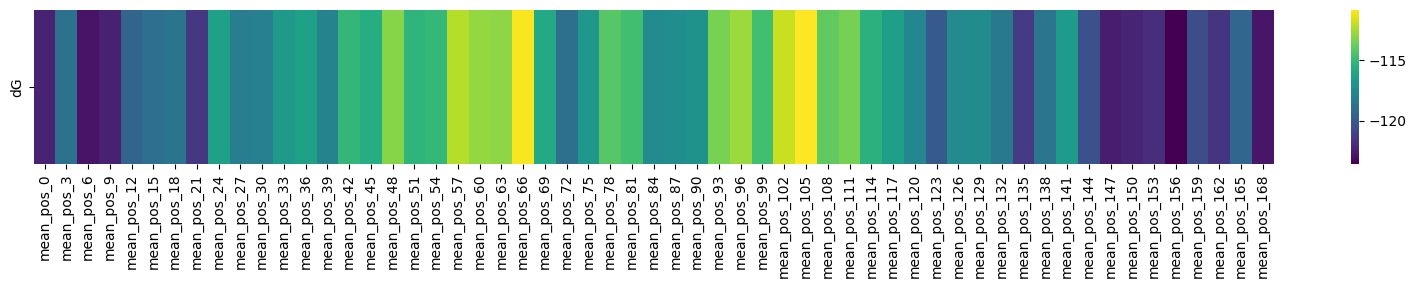

In [274]:
plt.figure(figsize=(20,2))
sns.heatmap(pd.DataFrame(mean_energies.loc[:,"dG"]).T.iloc[:,:80-23], cmap="viridis")

In [275]:
dG_per_pos = pd.DataFrame(mean_energies.loc[:,"dG"]).T.iloc[:,:80-22] 
mut_rates = pd.read_csv(f"{base_dir}/output/RL8_AraCLOV2/R1/RL8_AraCLOV2_Codon_mut_rate_per_pos.csv", index_col=0).T

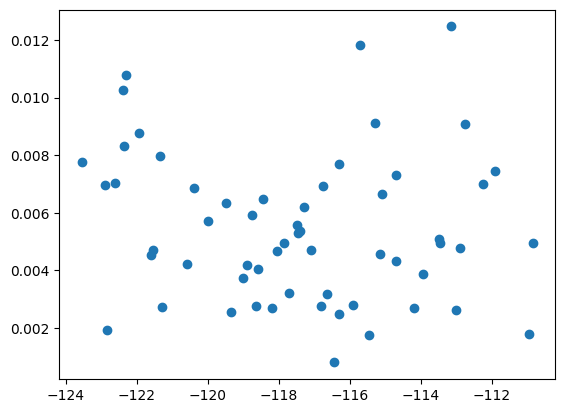

In [277]:
plt.plot(dG_per_pos.values.flatten(), mut_rates.values.flatten(), "o")